In [21]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with the data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable (species) to the DataFrame
iris_df["species"] = iris.target

# Display the DataFrame
print("Iris Dataset:")
print(iris_df.head())

Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [22]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
from sdv.metadata import SingleTableMetadata

metadata_iris = SingleTableMetadata()

In [24]:
metadata_iris.detect_from_dataframe(iris_df)

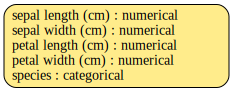

In [25]:
metadata_iris.visualize()

In [26]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer_iris = GaussianCopulaSynthesizer(metadata_iris)
synthesizer_iris.fit(iris_df)

In [27]:
synthetic_data_iris = synthesizer_iris.sample(num_rows=500)
synthetic_data_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,6.5,3.0,5.9,2.1,2
1,5.1,3.2,2.8,0.9,0
2,5.1,3.0,4.8,0.9,2
3,6.0,3.2,2.9,1.0,1
4,6.1,3.1,2.6,1.2,0


In [28]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=iris_df, synthetic_data=synthetic_data_iris, metadata=metadata_iris
)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 744.46it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%


In [29]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(iris_df, synthetic_data_iris, metadata_iris)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 10/10 [00:00<00:00, 159.11it/s]

Overall Score: 81.69%

Properties:
- Column Shapes: 84.61%
- Column Pair Trends: 78.76%


In [30]:
quality_report.get_details("Column Shapes")

,Column,Metric,Score
0,sepal length (cm),KSComplement,0.952000
1,sepal width (cm),KSComplement,0.612667
2,petal length (cm),KSComplement,0.776000
3,petal width (cm),KSComplement,0.912667
4,species,TVComplement,0.977333


In [31]:
import plotly.io as pio

pio.renderers.default = "notebook"

In [32]:
!pip install plotly


In [33]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=iris_df,
    synthetic_data=synthetic_data_iris,
    column_name="species",
    metadata=metadata_iris,
)

# fig.show()

In [34]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [37]:
synthetic_data_iris["species"].value_counts()

species
2    178
0    163
1    159
Name: count, dtype: int64

In [19]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
from sdv.evaluation.single_table import get_column_plot
import plotly.graph_objects as go

# Assuming you have real_data and synthetic_data_iris properly defined
fig = get_column_plot(
    real_data=iris_df,
    synthetic_data=synthetic_data_iris,
    column_name="species",
    metadata=metadata_iris,
)

# fig.show()
fig.write_image("column_plot.png")